In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from importlib import reload

In [333]:
#function to tag 'LD' and 'HD' phases
def tag_phases(x):
    if x.base.num_phases_max !=2:
        raise ValueError('bad tag function')
        

    if x.nphase==1:
        if x[0].density.values<0.5:
            return np.array([0])
        else:
            return np.array([1])
    
    elif x.nphase==2:
        return np.argsort(-x.argmax[0])
    else:
        raise ValueError('bad nphase')
    
            

In [774]:
import lnPi
reload(lnPi.spinodal)
reload(lnPi)

<module 'lnPi' from '/Users/wpk/Documents/python/lnPi/__init__.py'>

# create a reference lnPi_phases for bulk case

In [775]:
# play around
data = np.loadtxt('./PiofN/ljsf.t070.bulk.v729.r1.lnpi.dat')

lnpi_base = lnPi.lnPi.from_data(data, mu=-8.6160, volume=729., beta=1.0/0.7)



In [776]:
#from data
data = np.loadtxt('./PiofN/ljsf.t070.bulk.v729.r1.lnpi.dat')


lnpi_bulk = lnPi.lnPi_phases.from_data(data,mu=-8.6160,volume=729.00,beta=1.0/0.7,
                                       num_phases_max=2,                                       
                                       argmax_kwargs=dict(min_distance=[5,10,20,40]),
                                       ftag_phases=tag_phases)

        

In [777]:
#from file
lnpi_bulk = lnPi.lnPi_phases.from_file('./PiofN/ljsf.t070.bulk.v729.r1.lnpi.dat',
                                       mu=-8.6160,volume=729.00,beta=1.0/0.7,
                                       num_phases_max=2,                                       
                                       argmax_kwargs=dict(min_distance=[5,10,20,40]),
                                       ftag_phases=tag_phases)

In [778]:
#from matrix 1
val = data[:,-1]
lnpi_bulk = lnPi.lnPi(data = val,mask=False,num_phases_max=2,mu=-8.6160, volume=729., beta=1./0.7).to_phases(
    argmax_kwargs=dict(min_distance=[5,10,20,40]),
                                   ftag_phases=tag_phases)

In [779]:
#from matrix 2 (better)
Z = np.loadtxt('./PiofN/ljsf.t070.bulk.v729.r1.lnpi.dat')[:,-1]
#Z is the  'matrix' of lnPis, 1D in this case

In [780]:
print(Z[:20])

[-20.71351647 -19.80847807 -19.57175377 -19.71562267 -20.12230887
 -20.72691677 -21.48879027 -22.37998027 -23.37974467 -24.47284277
 -25.64559777 -26.88790597 -28.19182247 -29.54980747 -30.95593647
 -32.40447447 -33.89266847 -35.41474047 -36.96769747 -38.54879147]


In [781]:
lnpi_bulk = lnPi.lnPi_phases.from_matrix(Z,mu=-8.6160,volume=729.00,beta=1.0/0.7,
                                       num_phases_max=2,                                       
                                       argmax_kwargs=dict(min_distance=[5,10,20,40]),
                                       ftag_phases=tag_phases)

## create a collection

In [782]:
#collection of lnpis
C = lnPi.lnPi_collection.from_mu(lnpi_bulk,[None],np.linspace(-12,-5,20))

In [785]:
#set spinodal/binodal
C.get_spinodals()
C.get_binodals()
#sort by mu
C.sort_by_mu(inplace=True)

0
1


In [786]:
print(C.spinodals[0]._repr_html_())
print(C.spinodals[1]._repr_html_())
print(C.binodals[0]._repr_html_())

lnPi_phases: nphase=2, mu=[-7.46824698]
lnPi_phases: nphase=2, mu=[-9.58832717]
lnPi_phases: nphase=2, mu=[-8.63733388]


In [866]:
def make_Omega_vs_mu_phase_plot(C,spin=None,bino=None,ax=None,ax_labels=True):
    if ax is None:
        fig,ax = plt.subplots()
        
    if spin is None:
        spin = C.spinodals

    if bino is None:
        bino = C.binodals[0]
    
    for phase, g in C.Omegas_phaseIDs().reset_index().groupby('phase'):
        g.plot('mu_0','Omega', ax=ax)
    colors = [l.get_color() for l in ax.lines]
    
        
    for phase, (s, c) in enumerate(zip(spin, colors)):
        s.Omegas_phaseIDs().xs(phase, level='phase').reset_index().plot('mu_0','Omega', marker='o', color=c, ax=ax)
    bino.Omegas_phaseIDs().xs(0, level='phase').reset_index().plot('mu_0','Omega', marker='s', color='k', ax=ax)
    


    if ax_labels:
        ax.set_ylabel(r'$\Omega^{ex}$')
        ax.set_xlabel(r'$\mu$')
    

0 <lnPi.lnPi_phases object at 0x1c30696748> #1f77b4
1 <lnPi.lnPi_phases object at 0x1c30488940> #ff7f0e


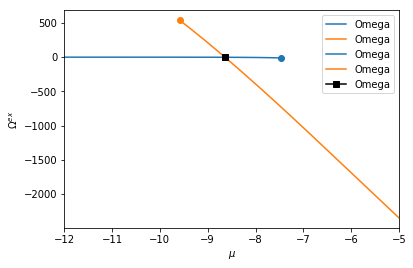

In [861]:
#plot
make_Omega_vs_mu_phase_plot(C)

# bulk 065

In [862]:
lnpi_bulk = lnPi.lnPi_phases.from_file('./PiofN/ljcut.t065.bulk.v1000.r1.lnpi.dat',mu=-4.453015418106743E+00,
                               volume=1000.0E0,num_phases_max=2,beta=1./0.65000E0,ZeroMax=True,fill_value=np.nan,
                                      argmax_kwargs=dict(min_distance=[5,10,20,40]),
                                ftag_phases=tag_phases)

In [863]:
Cbulk = lnPi.lnPi_collection.from_mu(lnpi_bulk,[None],np.linspace(-7,.2,50))
Cbulk.get_spinodals()
Cbulk.get_binodals()

Cbulk.sort_by_mu(inplace=True)

0
1


In [897]:
psat = (-Cbulk.binodals[0].Omegas_phaseIDs() / Cbulk[0].base.volume).iloc[0]

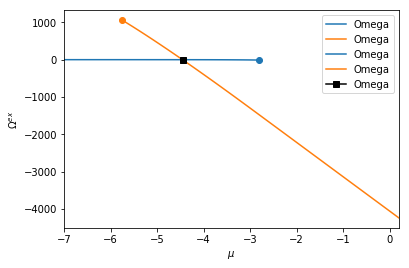

In [867]:
make_Omega_vs_mu_phase_plot(Cbulk)

# confined

In [868]:
def tag_phases_conf(x):
    if x.base.num_phases_max !=2:
        raise ValueError('bad tag function')
        
    L = []
    for p in x.phases:
        if p.density.values<0.5:
            val = 0
        else:
            val = 1
        L.append(val)
        
    L = np.array(L)
    


    return L

In [869]:
#make up a volume

lnpi_conf = lnPi.lnPi_phases.from_file('./PiofN/ljcut.t065.finiteslit.L_20nm.W_4nm.r2.lnpi.dat',
                                mu=-0.500000E+01,volume=7000.,beta=1./0.65000E0,
                                num_phases_max=2,ZeroMax=True,fill_value=np.nan,
                                      argmax_kwargs=dict(min_distance=[5,10,20,40]),ftag_phases=tag_phases_conf,
                                build_kwargs=dict(merge_phaseIDs=True))

In [870]:
Cconf = lnPi.lnPi_collection.from_mu(lnpi_conf,[None],np.linspace(-5.2,-5.0,50)) #np.linspace(-8,-5,10)
Cconf.get_spinodals()
Cconf.get_binodals()
Cconf.sort_by_mu(inplace=True)

/Users/wpk/Documents/python/lnPi/__init__.py:1632: RuntimeWarning: All-NaN slice encountered
  new_row = np.nanmin(Etrans[[idx_kill, idx_keep], :], axis=0)


0
1


(-5.14, -5.09)

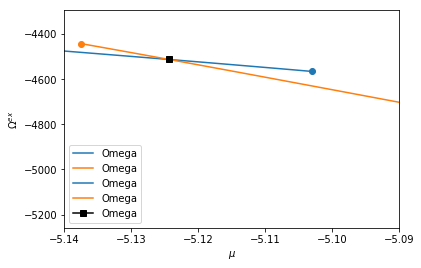

In [872]:
make_Omega_vs_mu_phase_plot(Cconf.merge_phases(efac=0.9),Cconf.spinodals,Cconf.binodals[0])


ax=plt.gca()
ax.set_xlim(-5.14,-5.09)

In [933]:
df=pd.read_table('./PiofN/ljcut.t065.finiteslit.L_20nm.W_4nm.r2.single_isotherm.txt',sep='\s+',
                 header=None,names=['pscaled','mu','rho','Omega_L','Qst','Gads'])


/Users/wpk/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [934]:
#make isotherm

In [1047]:
a = np.linspace(-20,Cconf.spinodals[1].mu[0],100)
b = np.linspace(Cconf.spinodals[1].mu[0],Cconf.spinodals[0].mu[0],100)
c = np.linspace(Cconf.spinodals[0].mu[0],Cbulk.binodals[0].mu[0],100)
mus = np.concatenate((a,b,c))

In [1048]:
Cb = lnPi.lnPi_collection.from_mu(lnpi_bulk,[None],x=mus)
Cc = lnPi.lnPi_collection.from_mu_iter(lnpi_conf,Cb.mus)

In [1053]:
P = (-Cb.Omegas_phaseIDs().xs(0, level='phase') / Cb[0].base.volume / psat).rename('pressure')
rho = Cc.Naves_phaseIDs

iso = rho.reset_index().merge(P.reset_index(), on=['beta','mu_0'])

(0, 1.0)

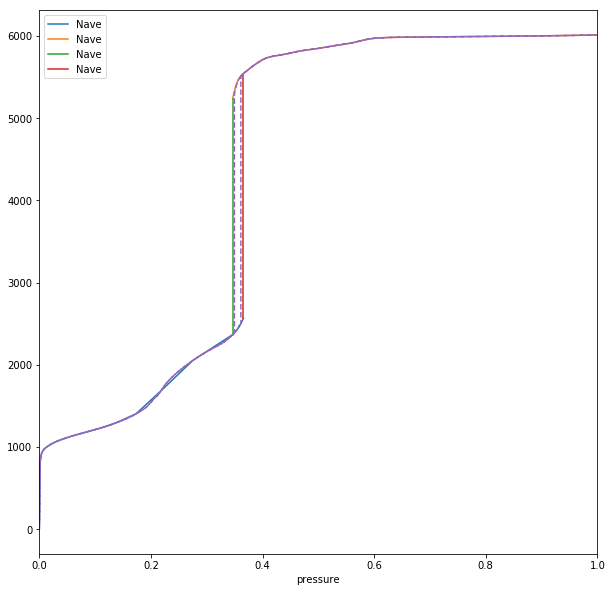

In [1054]:
fig,ax = plt.subplots(figsize=(10,10))
for phase, g in iso.groupby('phase'):
    g.plot('pressure','Nave', ax=ax)

iso.query('mu_0==@b[0]').drop_duplicates().plot('pressure','Nave', ax=ax)
iso.query('mu_0==@b[-1]').drop_duplicates().plot('pressure','Nave', ax=ax)

plt.plot(df.pscaled,df.rho,'--')
plt.gca().set_xlim(0,1.0)


(0.3, 0.5)

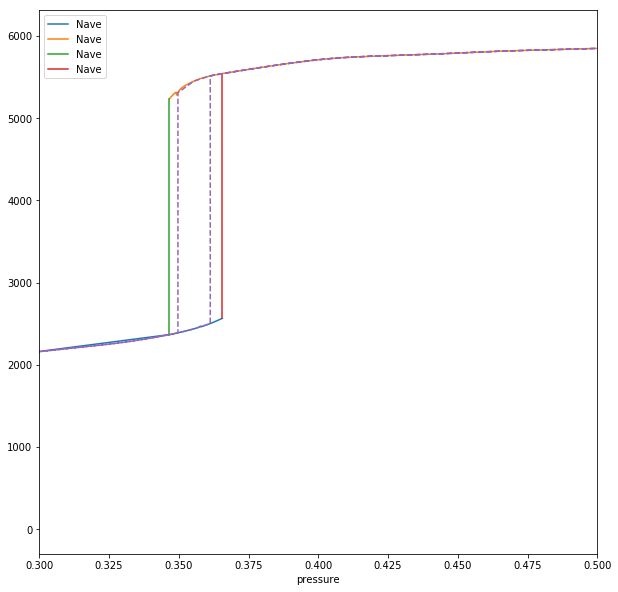

In [1040]:
fig,ax = plt.subplots(figsize=(10,10))
for phase, g in iso.groupby('phase'):
    g.plot('pressure','Nave', ax=ax)

iso.query('mu_0==@b[0]').drop_duplicates().plot('pressure','Nave', ax=ax)
iso.query('mu_0==@b[-1]').drop_duplicates().plot('pressure','Nave', ax=ax)

plt.plot(df.pscaled,df.rho,'--')
plt.gca().set_xlim(0.3,0.5)
